# Mnist


Los valores de los hiperparámetros con los que obtuve los resultados son:
- Optimizador: Adagrad, Momentum y Adam
- Learning rate: 0.01, 0.005 y 0.003
- Epochs :  50
- Función de Activación : Sigmoid, Tanh
- Capas de la Red : 3
- Neuronas de cada capa : 784, 80, 40, 10

In [1]:
import numpy as np
from main.neural_network import train, test_nn, predict
from main.neural_network import create_nn
from main.nn_components.activations_functions import LeakyRelu, Tanh, Relu, Sigmoid
from main.nn_components.optimazers import SGD, Adam, Adagrad, Momentum, RMSProp
from main.nn_components.loss_functions import CrossEntropyLoss
from main.nn_components.graphic_regression import learning_curve
from main.nn_components.graphic_classification import display_images
from keras.utils import to_categorical
from keras.datasets import mnist
from main.nn_components.graphic_classification import display_confusion_matrix

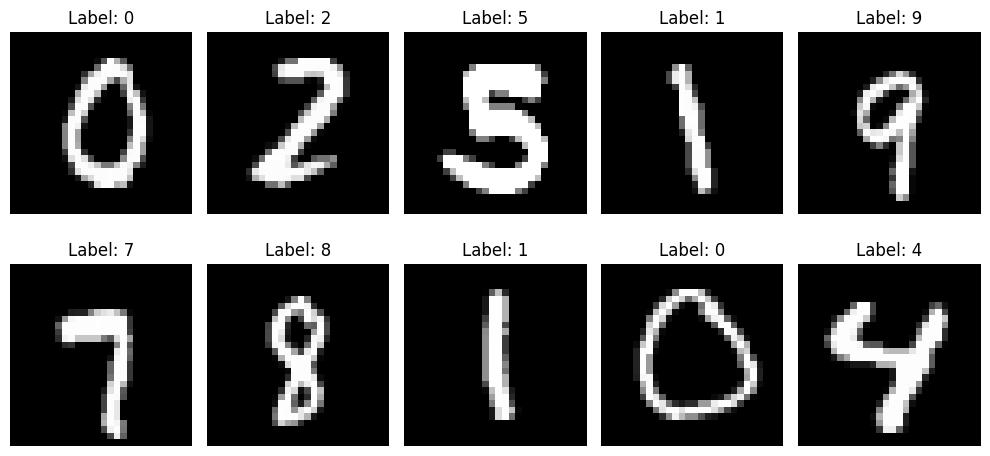

In [2]:
def prepare_samples(x, y, start=0, end=1000):
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[start:end], y[start:end]

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()
x_train, y_train = prepare_samples(x_train_raw, y_train_raw, start=0, end=5000)

x_test, y_test = prepare_samples(x_test_raw, y_test_raw, start=0, end=1000)

x_val, y_val = prepare_samples(x_test_raw, y_test_raw, start=1001, end=1050)

display_images(x_val.reshape(-1, 28, 28), y_val, num_images=10)

In [3]:
optimizers = [
    Adam(learning_rate=0.005),
    RMSProp(learning_rate=0.007),
    SGD(learning_rate=0.01)
]

activations = [Sigmoid(), Tanh(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 100, 50, 10], activation_function=activations, optimizers=optimizers)

In [4]:
train_loss = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=90)

Final Loss = 0.039871431057288964


In [5]:
y_true, y_pred = test_nn(nn, x_test, y_test)

Accuracy: 92.5%


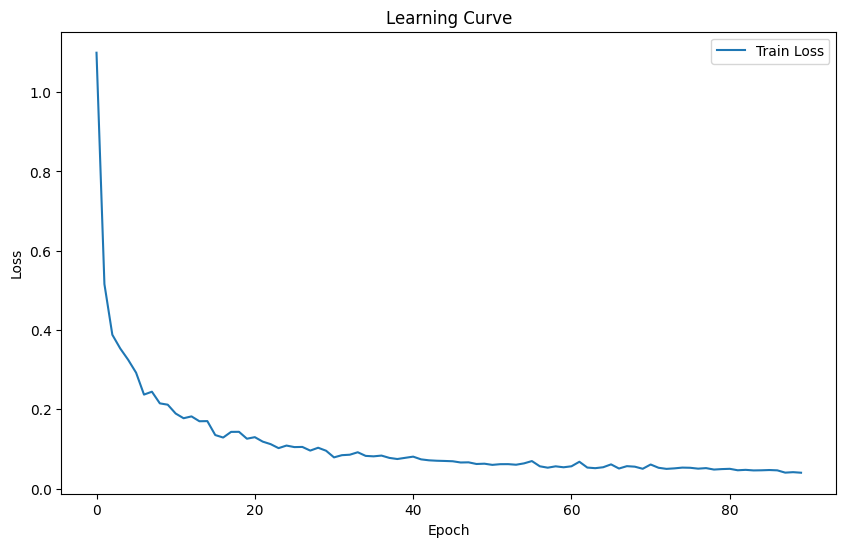

In [6]:
learning_curve(train_loss)

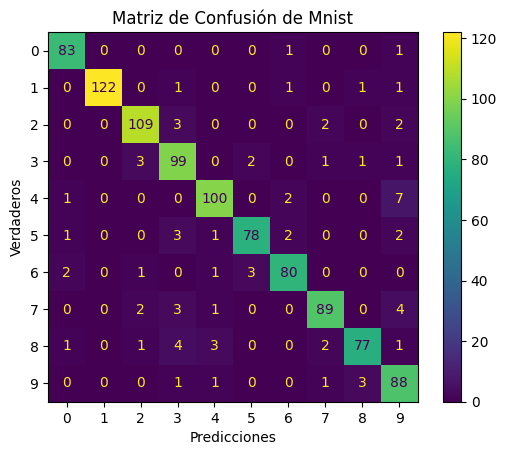

In [7]:
display_confusion_matrix(y_true, y_pred, labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title='Matriz de Confusión de Mnist')

In [8]:
n = 10
predictions = []
for x in x_val[:n]:
    pred = np.argmax(predict(nn, x))
    predictions.append(pred)

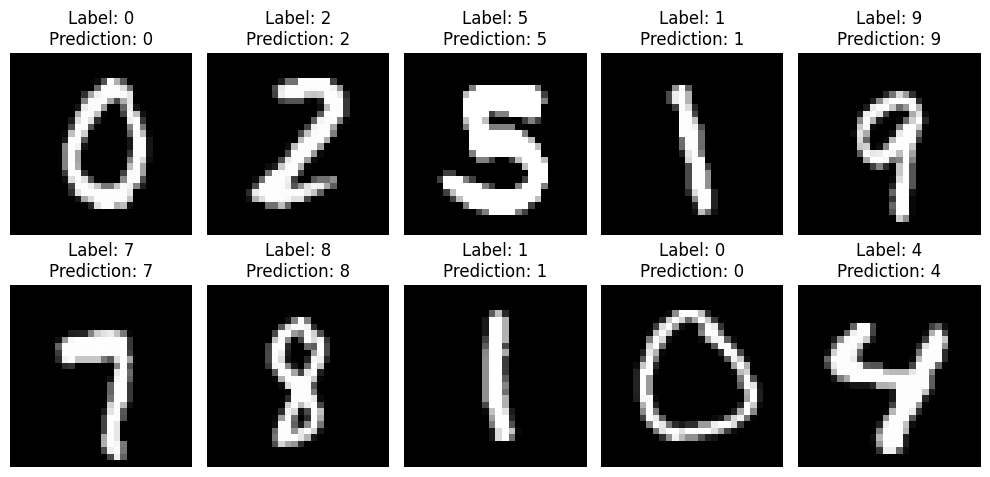

In [9]:
display_images(x_val.reshape(-1, 28, 28), y_val, num_images=n, pred=predictions)

# Experimentos Previos

### Test1

In [15]:
optimizers = [
    RMSProp(learning_rate=0.007),
    RMSProp(learning_rate=0.007),
    RMSProp(learning_rate=0.007)
]

activations = [Sigmoid(), Sigmoid(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 50, 25, 10], activation_function=activations, optimizers=optimizers)

In [16]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

Final Loss = 0.19655254106509645


In [17]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 90.5%


### Test2

In [10]:
optimizers = [
    Adagrad(learning_rate=0.01),
    Momentum(learning_rate=0.005),
    Adam(learning_rate=0.003)
]

activations = [Tanh(), Sigmoid(), Tanh()]

nn = create_nn([28*28, 80, 40, 10], activation_function=activations, optimizers=optimizers)

In [11]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

Final Loss = 0.5513660348312441


In [12]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 81.2%


### Test3

In [15]:
optimizers = [
    RMSProp(learning_rate=0.007),
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.003)
]

activations = [LeakyRelu(), Relu(), Sigmoid()]

nn = create_nn([28*28, 150, 75, 10], activation_function=activations, optimizers=optimizers)


In [16]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

Final Loss = 26.69695054022346


In [17]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 24.2%


### Test4

In [33]:
optimizers = [
    Adagrad(learning_rate=0.03),
    Momentum(learning_rate=0.01),
    Adam(learning_rate=0.08)
]

activations = [Tanh(), Tanh(), Sigmoid()]

loss = CrossEntropyLoss()

nn = create_nn([28*28, 80, 40, 10], activation_function=activations, optimizers=optimizers)

In [34]:
_ = train(nn, loss, x_train, y_train, x_val=x_val, y_val=y_val, epochs=50)

Final Loss = 24.826026211121622


In [35]:
_, _ = test_nn(nn, x_test, y_test)

Accuracy: 37.0%


# Prueba con Mini Lotes